<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

11:28:25 INFO << load arm CSV.
11:28:25 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 2)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:32<00:00, 10.77s/it]


11:34:39 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
11:34:39 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


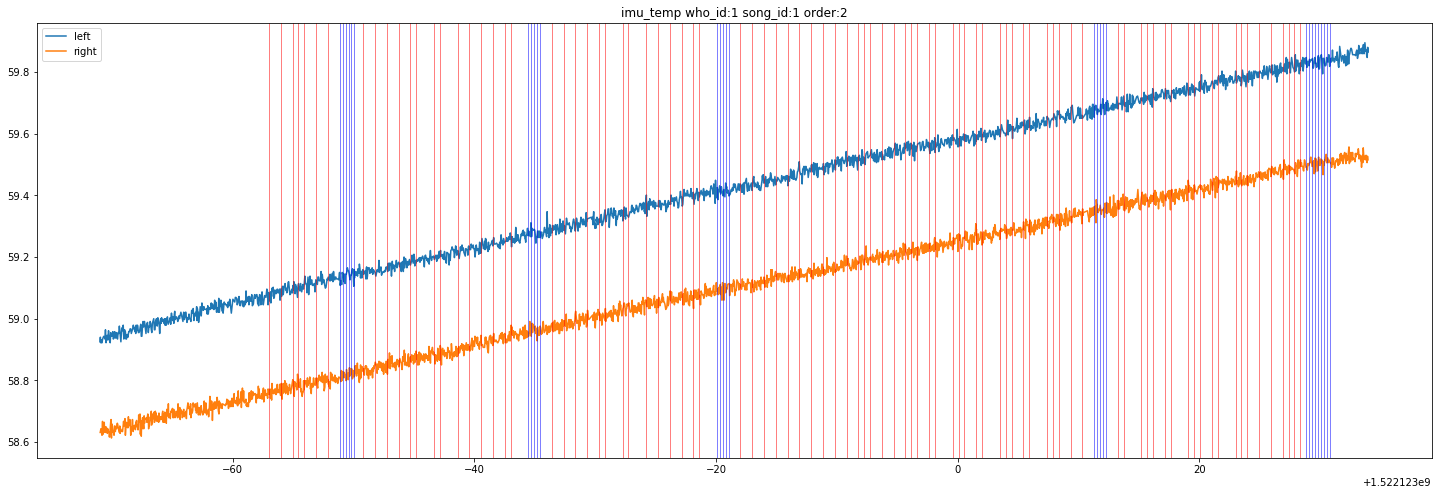

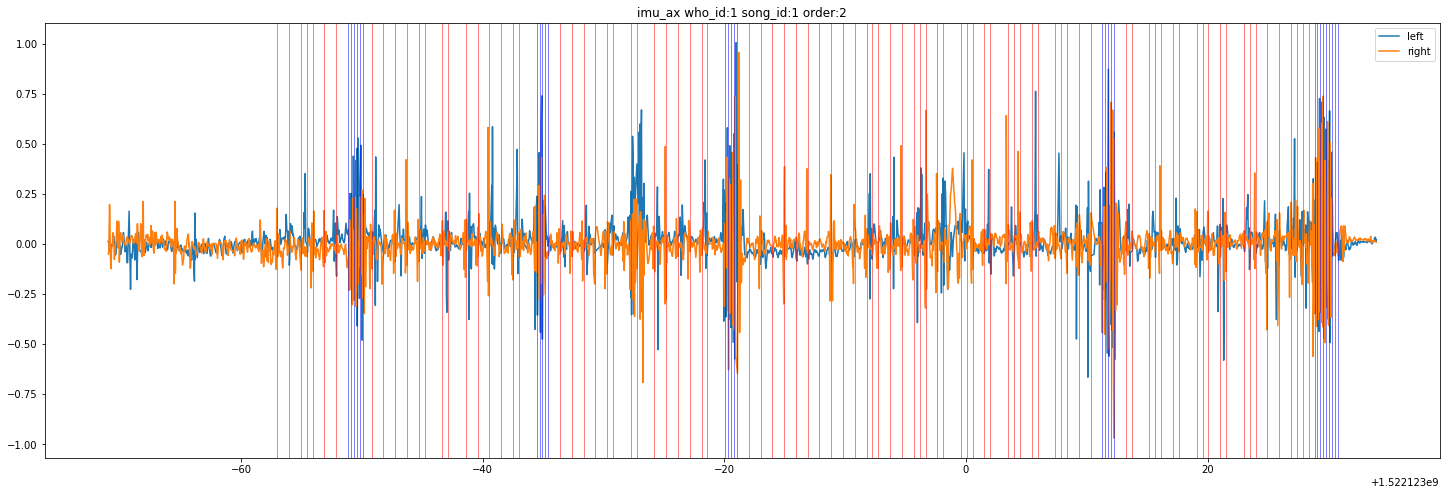

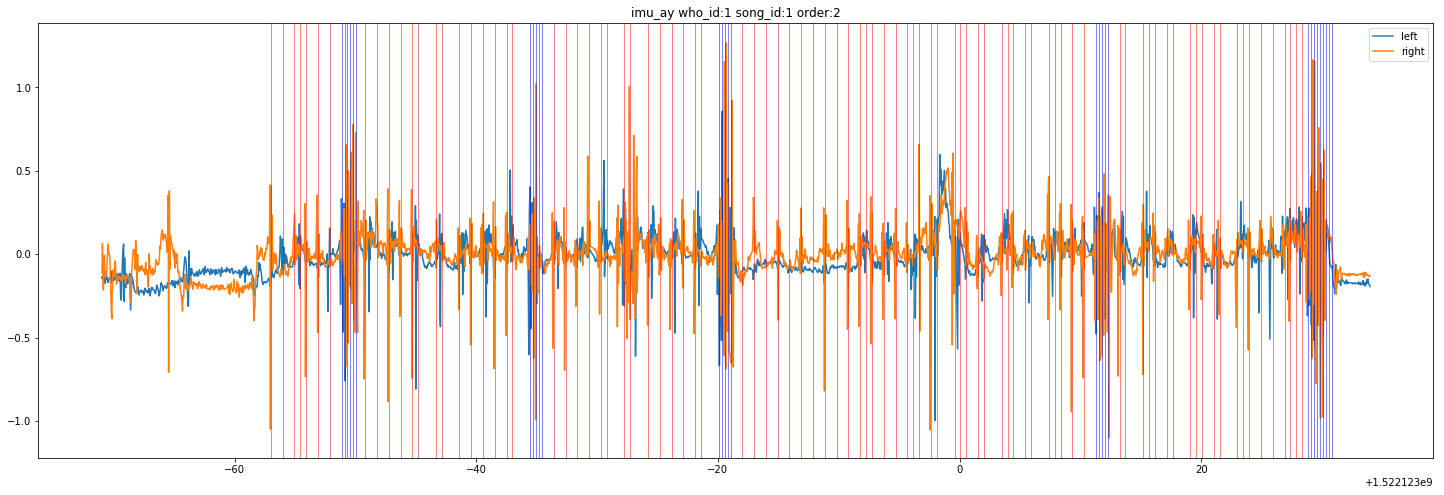

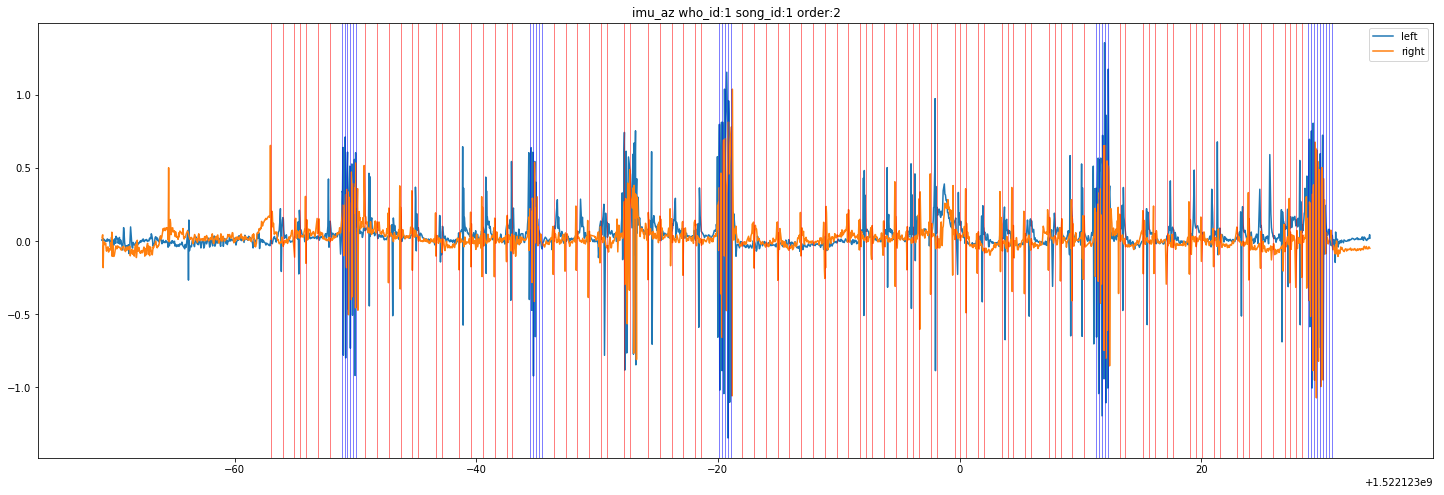

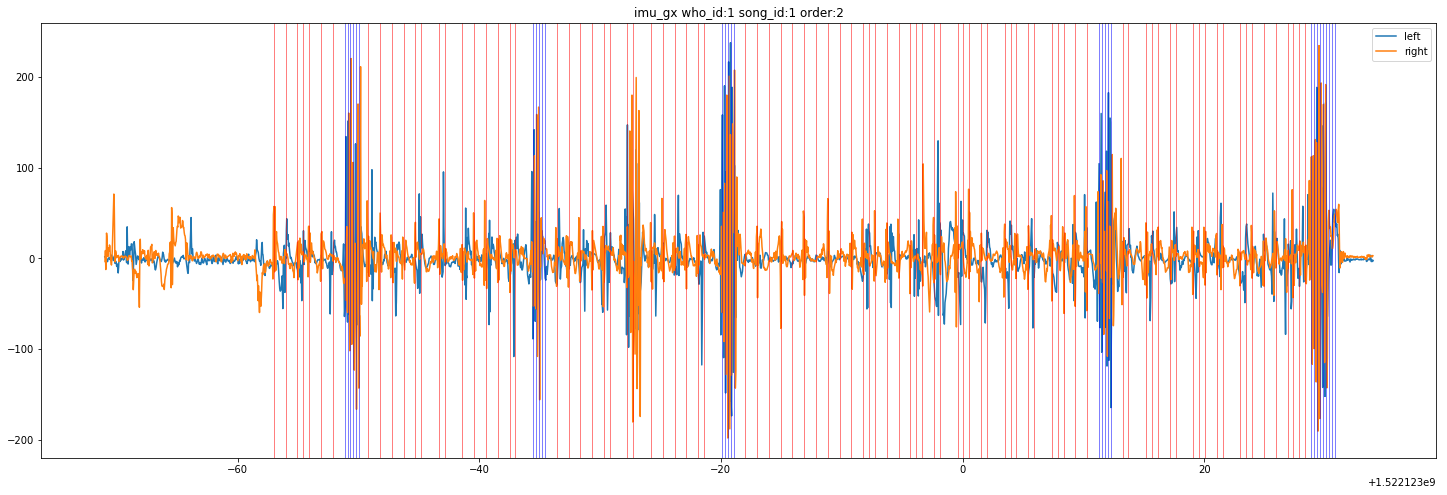

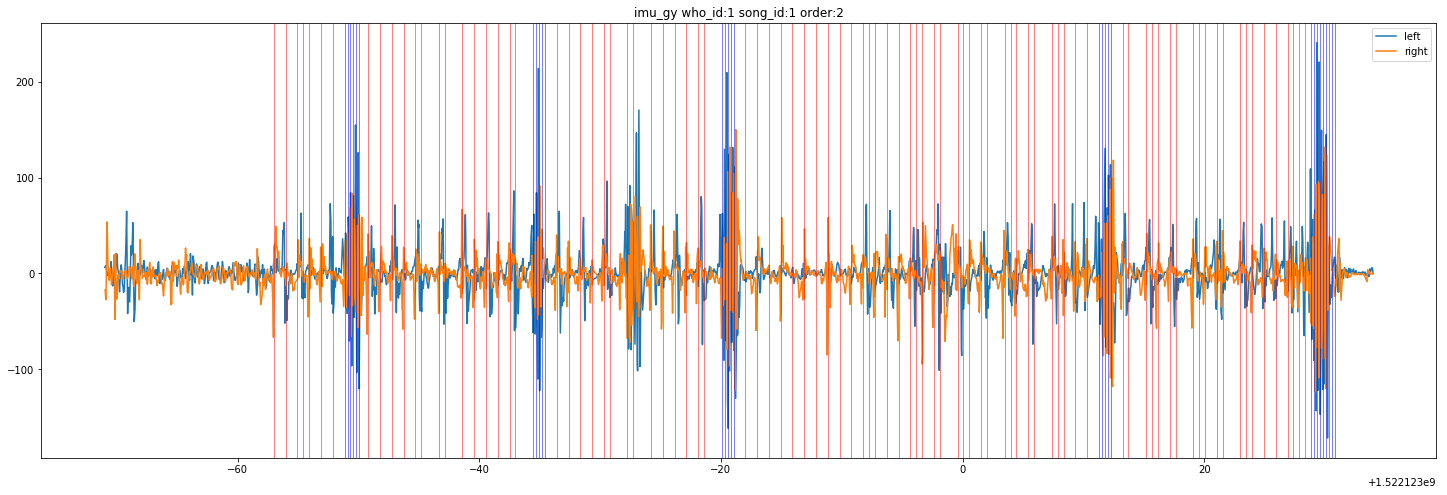

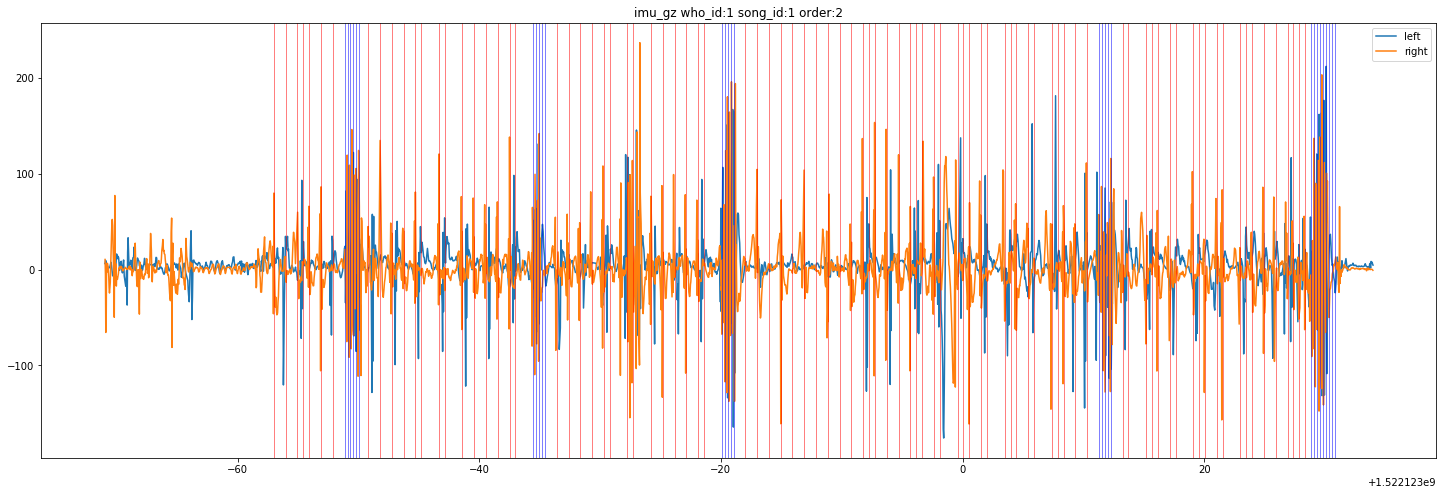

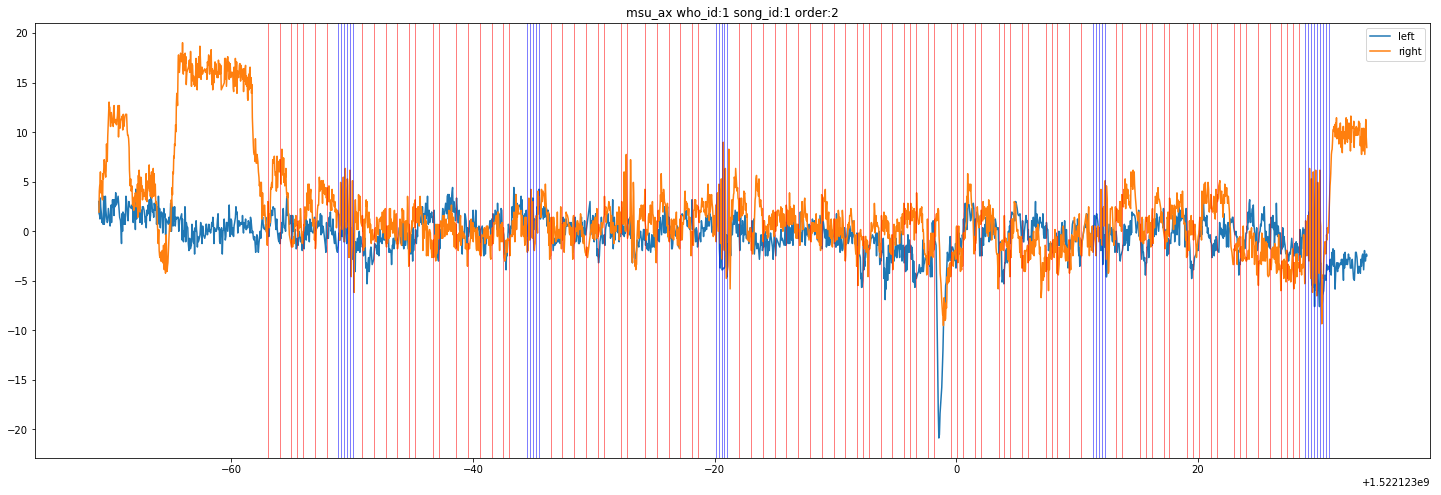

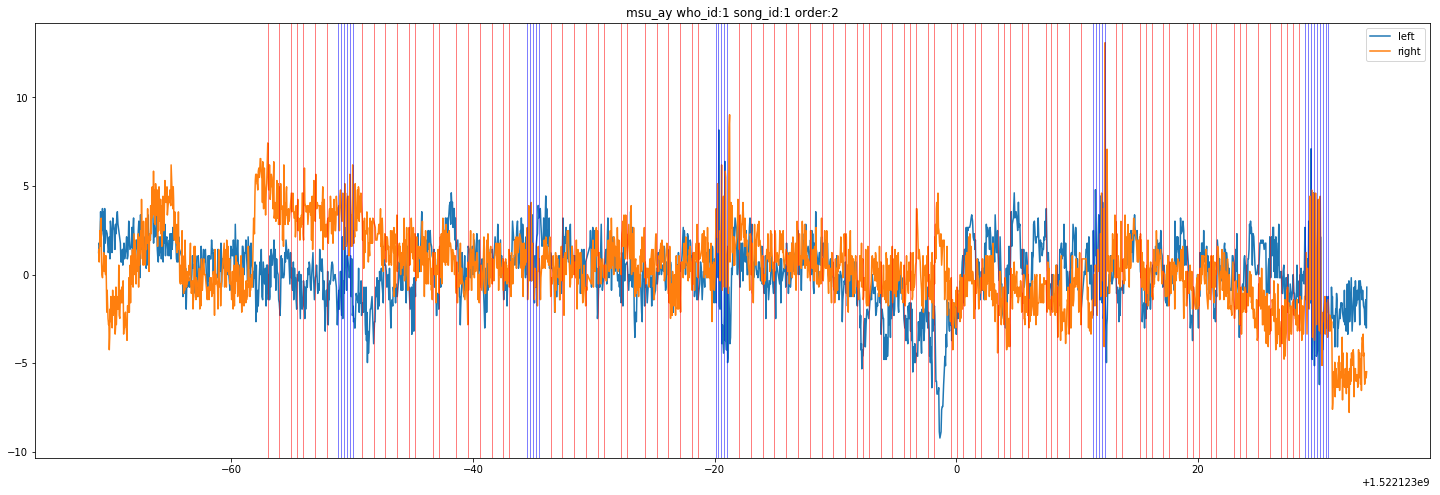

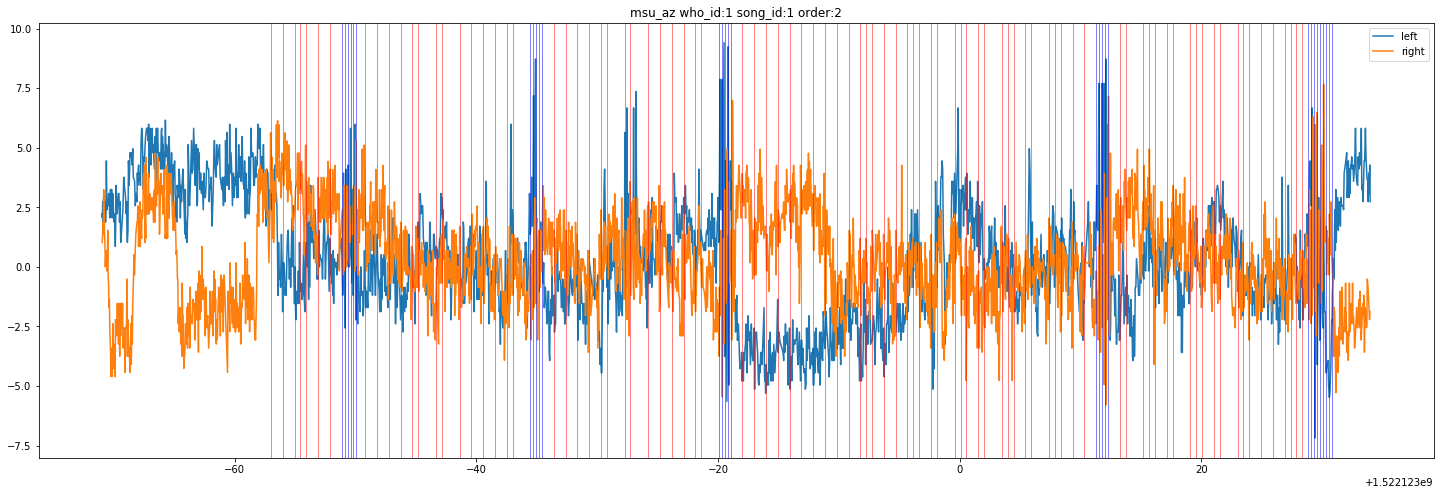

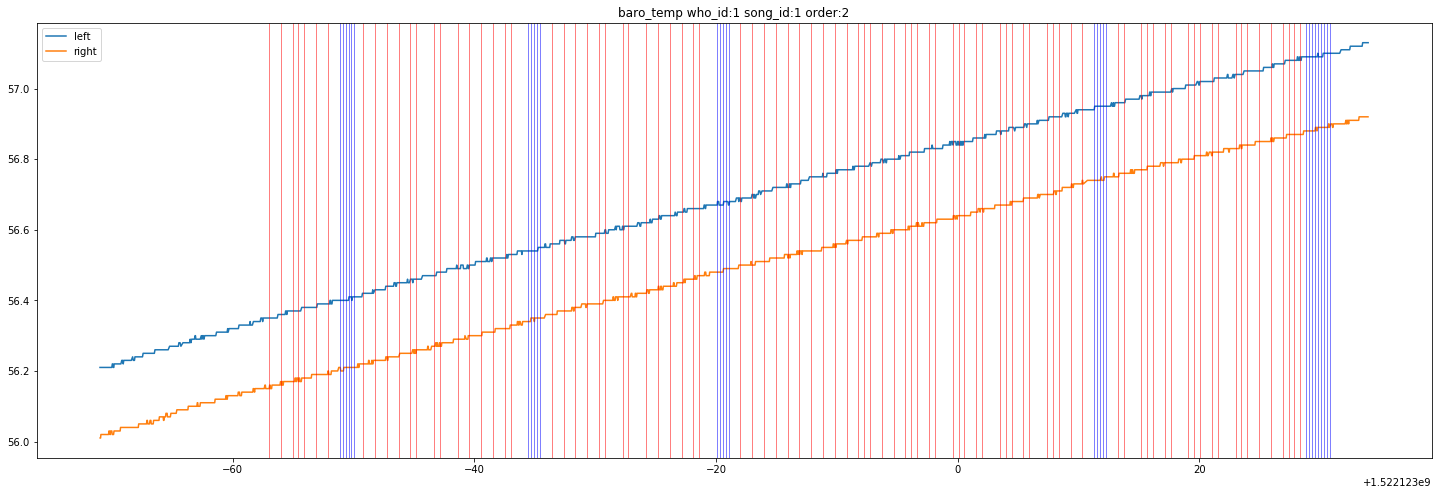

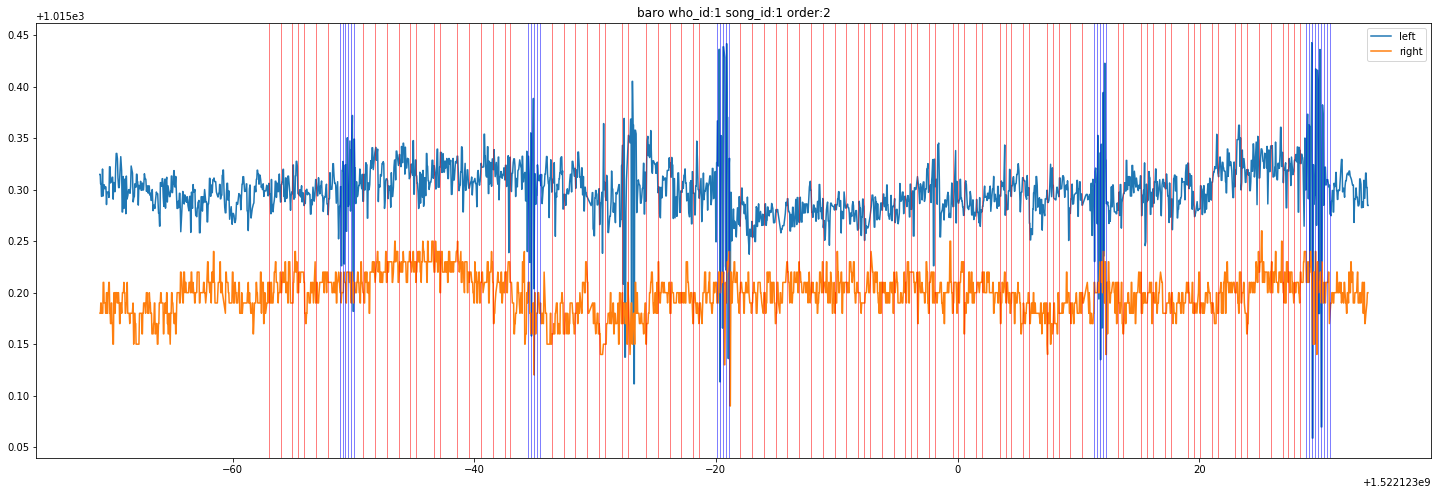

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.141062,0.000108,0.167000,8.456323,7.778079,12.688714,0.020007,79.287482,0.135816,9.016117,...,0.428571,0.428571,0.285714,0.571429,-0.780563,0.663418,-0.675093,0.783876,0.531338,0.695925
1,0.147515,0.000304,0.168800,3.817207,1.306124,5.589600,0.022065,15.877194,0.147414,4.086836,...,0.428571,0.428571,0.428571,0.285714,0.073265,-0.217846,-0.750618,-0.653571,0.780631,-0.450475
2,0.156863,0.000107,0.197200,11.068725,17.524793,16.342200,0.024713,140.041469,0.157410,14.091712,...,0.375000,0.375000,0.375000,0.125000,-0.963730,0.173309,-0.080756,0.778753,-0.573040,-0.203625
3,0.141142,0.000612,0.165600,6.872436,23.266442,10.885400,0.020533,70.496813,0.135263,3.756415,...,0.285714,0.285714,0.142857,0.142857,-0.376037,-0.517694,-0.243909,0.455305,-0.857177,-0.441418
4,0.152196,0.000050,0.191500,19.018821,23.046415,29.726500,0.023214,384.761985,0.153227,18.555947,...,0.285714,0.142857,0.285714,0.142857,-0.541089,-0.091386,-0.479426,-0.341057,0.549443,-0.853314
5,0.139679,0.000215,0.181600,11.041207,25.646303,15.446400,0.019725,147.554551,0.146540,10.134862,...,0.285714,0.571429,0.142857,0.571429,-0.730191,0.479098,-0.581351,-0.472591,0.684161,-0.186039
6,0.208038,0.004982,0.265750,16.632818,15.692242,23.505750,0.048262,292.342873,0.212990,16.589245,...,0.428571,0.285714,0.428571,0.142857,-0.730150,0.406229,-0.489686,0.639052,0.952824,0.485794
7,0.184353,0.010225,0.275600,46.865487,125.639012,65.314000,0.044211,2322.012908,0.176051,45.861466,...,0.400000,0.400000,0.400000,0.600000,-0.290160,0.241822,-0.903651,0.831829,0.841244,0.538347
8,0.168104,0.000889,0.233500,24.470452,32.495834,35.595833,0.029148,631.298876,0.166169,23.483115,...,0.428571,0.428571,0.142857,0.285714,-0.854641,0.524011,-0.375256,0.550408,0.414186,0.261012
9,0.216536,0.010858,0.324500,32.314861,272.636971,48.303750,0.057746,1316.887206,0.177843,26.997328,...,0.200000,0.200000,0.200000,0.200000,-0.346739,0.723560,0.046171,0.501128,-0.405216,-0.280302


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.31397184 -0.35678313  1.17049127 ... -0.25788228  1.64693308
   0.05883691]
 [ 1.17211141 -0.35383274  1.04558324 ... -0.80408636  1.26591721
  -0.59794051]
 [ 0.78057384 -0.31428997  0.60866075 ...  1.26963003  1.49821239
   1.54876072]
 ...
 [ 2.44806946 -0.35717195  2.1249007  ...  0.31973121 -0.00823114
  -1.12011267]
 [ 2.38562134 -0.35771297  2.18608046 ...  1.07608601  1.72266151
   1.25513103]
 [ 2.49327647 -0.35927469  2.17287963 ...  1.65605268 -1.15753401
  -1.02206225]]


100%|██████████| 361/361 [00:20<00:00, 17.89it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.9010989  0.0989011 ]
 [0.26666667 0.73333333]]


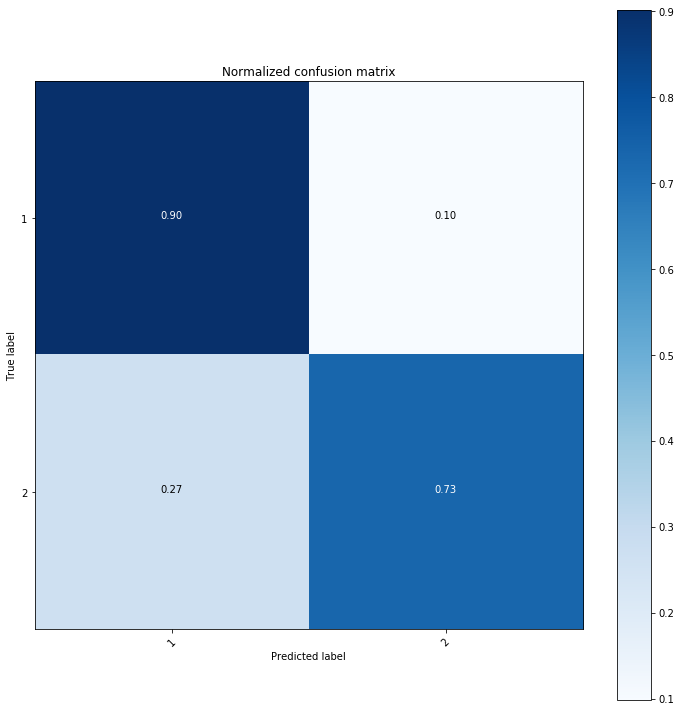

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.74it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94505495 0.05494505]
 [0.26666667 0.73333333]]


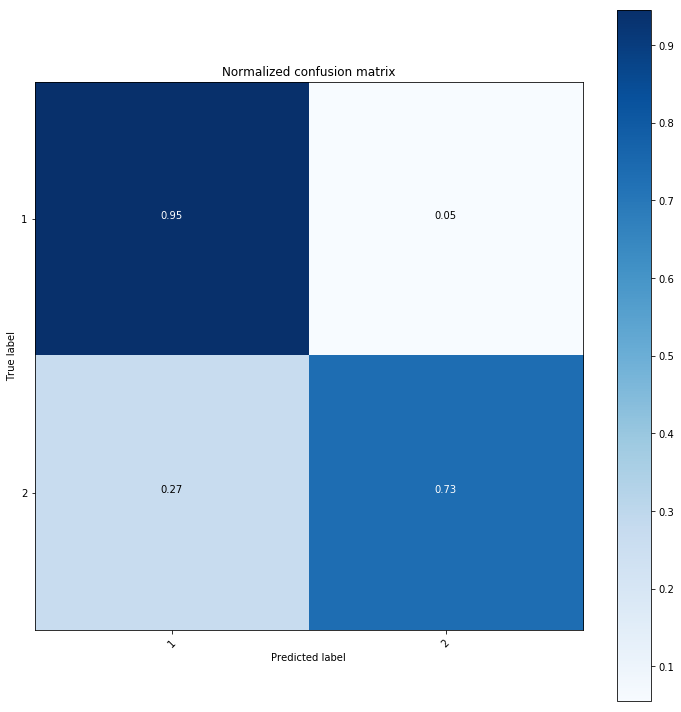

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.         1.        ]]


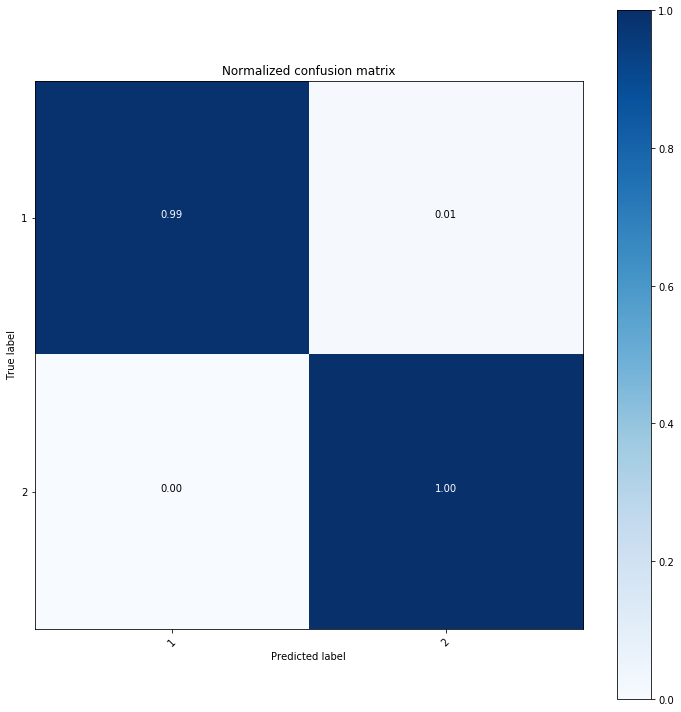

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[-0.39969528 -0.25404051 -0.37999195 ...  0.19640304 -1.66865692
  -1.88900715]
 [-0.40248477 -0.25339841 -0.39530528 ...  0.73550602 -0.95862874
  -1.63405663]
 [-0.39504642 -0.25319154 -0.38228895 ... -1.10431206 -1.26383863
  -0.82279664]
 ...
 [ 1.20309025 -0.20487599  1.2761451  ... -1.88970727 -0.9794641
  -1.52032452]
 [ 0.82421364 -0.22572831  0.85751684 ...  0.5576633  -1.85908314
  -2.67300433]
 [ 0.77304618 -0.23576869  0.93257952 ... -0.00583667 -1.79672805
  -2.36581688]]


100%|██████████| 361/361 [00:20<00:00, 17.73it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.59it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.92307692 0.07692308]
 [0.2        0.8       ]]


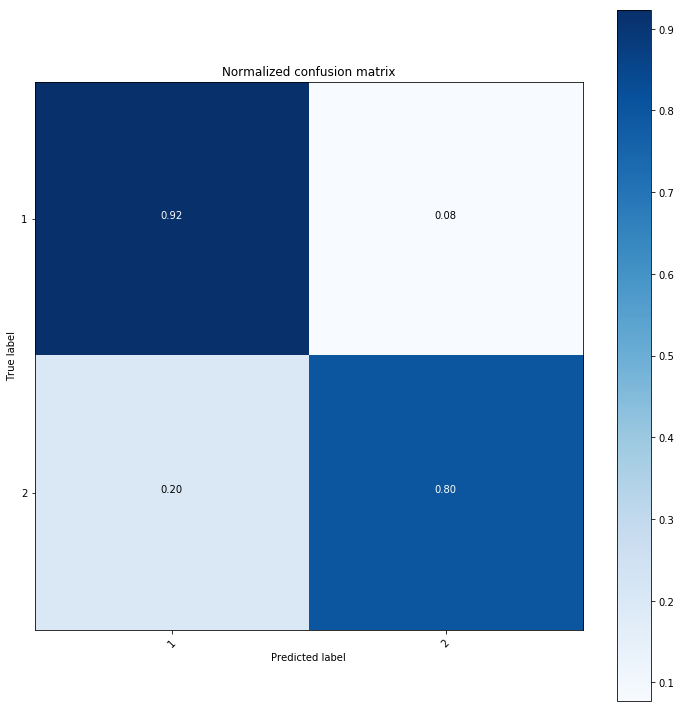

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.65it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.93406593 0.06593407]
 [0.23333333 0.76666667]]


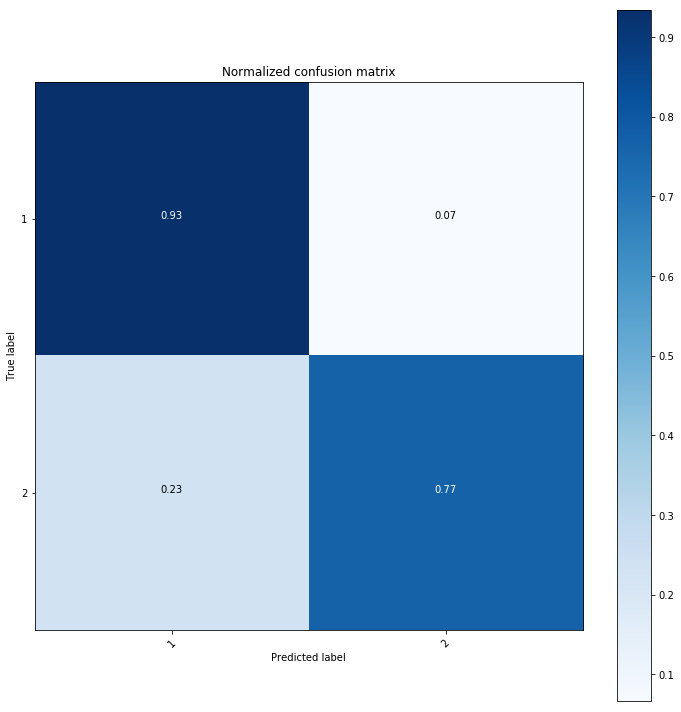

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


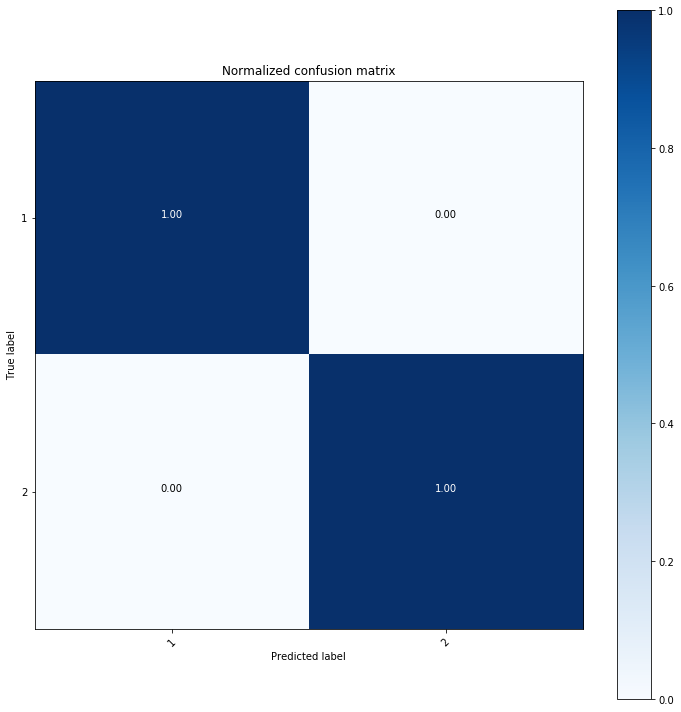

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[ 3.36891076e-02 -2.30454097e-01 -3.15800857e-02 ... -8.50834572e-01
   5.70164163e-01 -2.24110809e+00]
 [ 5.51609421e-02 -2.34846893e-01 -4.83075842e-02 ... -1.05821326e+00
   4.18725516e-01 -1.80632658e+00]
 [-2.03383286e-02 -2.31952015e-01 -9.41596104e-02 ... -1.02480962e+00
   1.06975457e+00 -1.80296111e+00]
 ...
 [ 4.09689386e-01 -2.33670547e-01  5.08030335e-01 ...  1.37604443e+00
  -2.15168340e+00 -2.11278719e+00]
 [ 3.26217475e-01 -2.34034415e-01  3.21565428e-01 ...  6.66121080e-01
   4.78098052e-01  6.40826410e-01]
 [ 3.98265693e-01 -2.34721929e-01  4.58102573e-01 ...  1.93562265e-04
   1.02454872e+00 -9.13110615e-01]]


100%|██████████| 361/361 [00:20<00:00, 17.52it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.48it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.63333333 0.36666667]]


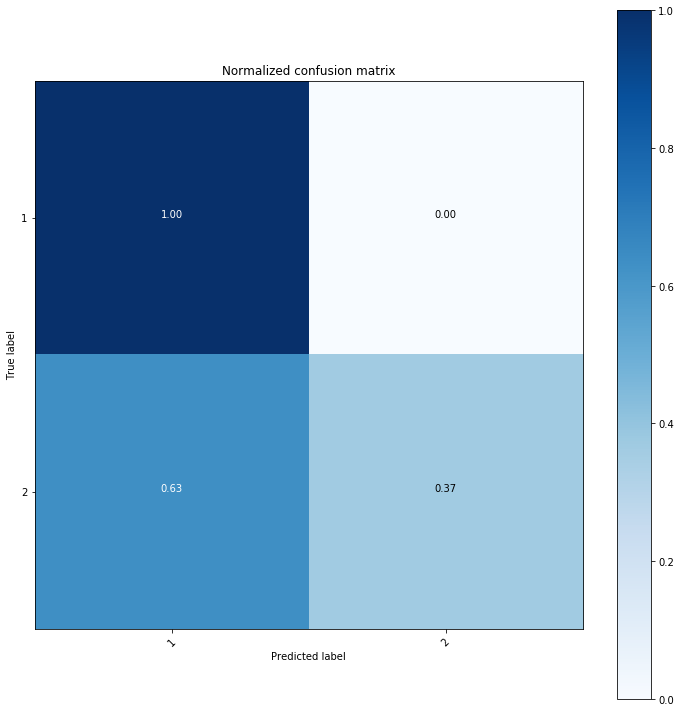

predicting 2 performance


100%|██████████| 361/361 [00:19<00:00, 18.12it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.  0. ]
 [0.6 0.4]]


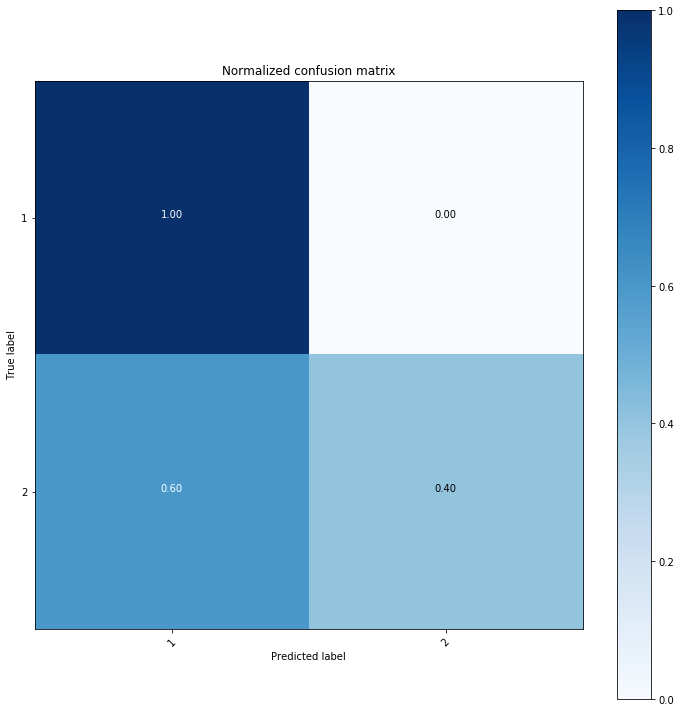

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


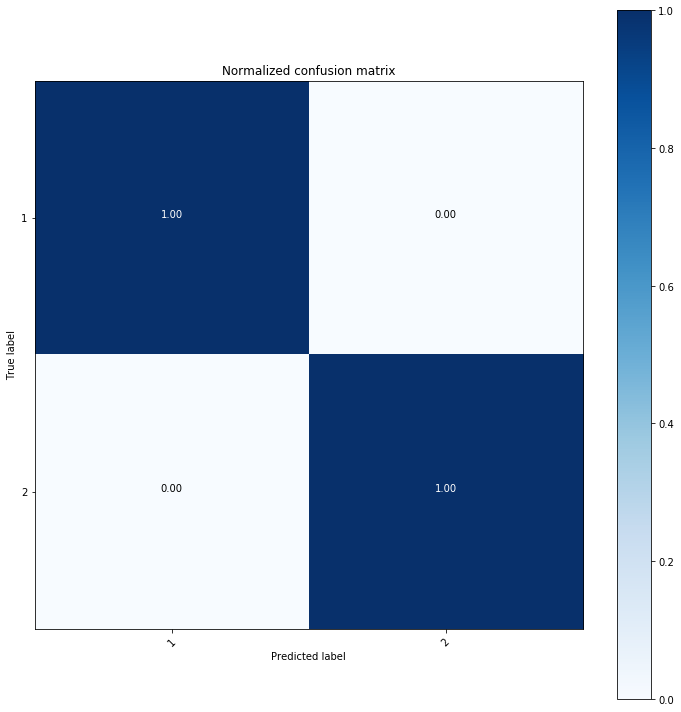

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[ 1.2086     -0.23951153  0.94929031 ...  0.39579992  0.39624888
  -0.0291282 ]
 [ 1.22344416 -0.23915893  0.96169068 ...  0.3857783   0.66823299
  -0.03477043]
 [ 1.22898636 -0.23866901  0.97929121 ...  0.79491618  0.77960809
   0.46380226]
 ...
 [ 0.92325936 -0.2395974   0.80028581 ...  1.23660941  0.67878367
   0.88969112]
 [ 0.92714253 -0.23952531  0.79785716 ...  1.13613922 -3.1464868
  -1.77956188]
 [ 0.93383882 -0.23958915  0.80088582 ...  0.3753477  -0.58518083
   0.01849986]]


100%|██████████| 361/361 [00:20<00:00, 17.70it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.54it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.32967033 0.67032967]
 [0.56666667 0.43333333]]


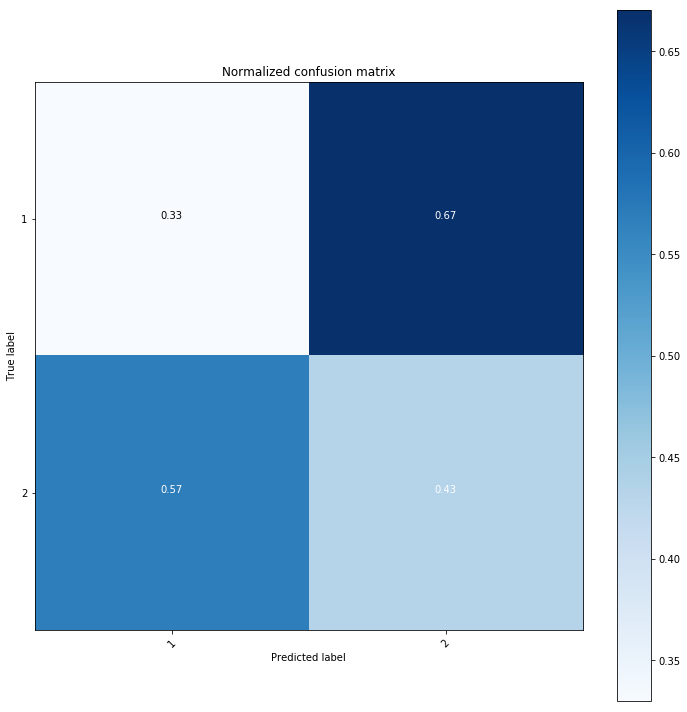

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.61it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.13333333 0.86666667]]


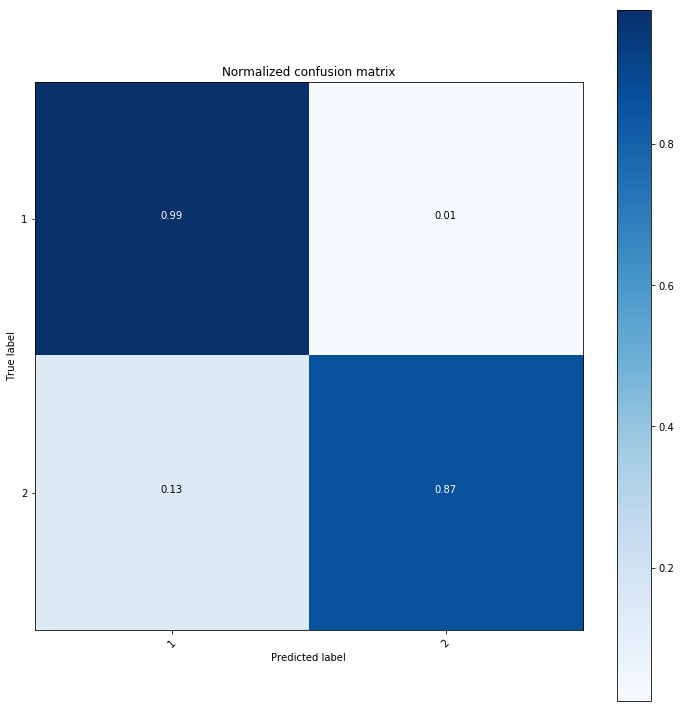

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.70it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


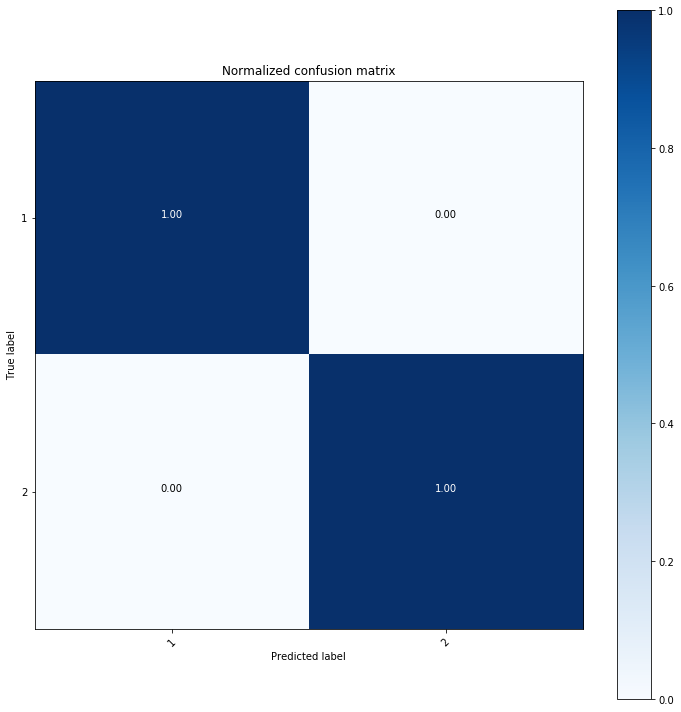

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[-0.47103966 -0.52997507 -0.42150004 ... -1.4486623   0.69622543
  -1.0850313 ]
 [-0.50892579 -0.52763369 -0.43670624 ... -1.31801655  0.91616557
  -0.81407657]
 [-0.55660818 -0.53155827 -0.48512009 ...  0.31586208 -0.55294877
  -0.23235161]
 ...
 [ 0.56961652 -0.52660108  0.62146639 ... -0.4972373  -0.15079425
  -1.90722479]
 [ 0.80905781 -0.49216589  0.7757646  ... -1.53789444 -1.52599679
   0.91222098]
 [ 0.95909218 -0.52022279  0.68318568 ... -1.59114853  1.48811656
  -1.90403785]]


100%|██████████| 361/361 [00:20<00:00, 17.65it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:14<00:00, 24.33it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


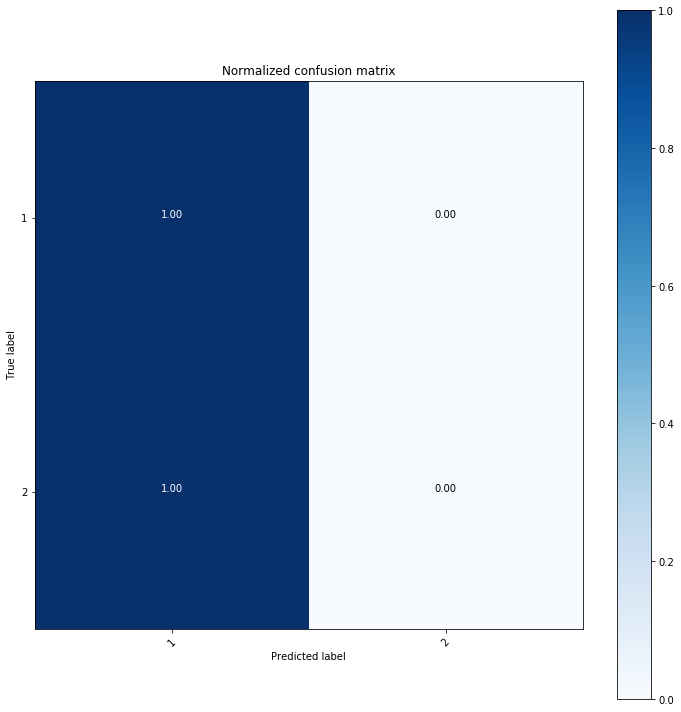

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.62it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.16666667 0.83333333]]


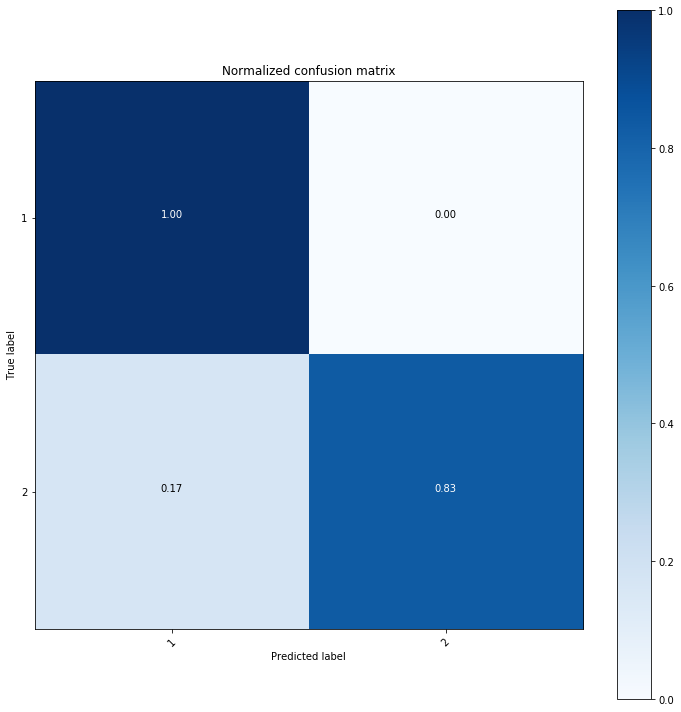

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


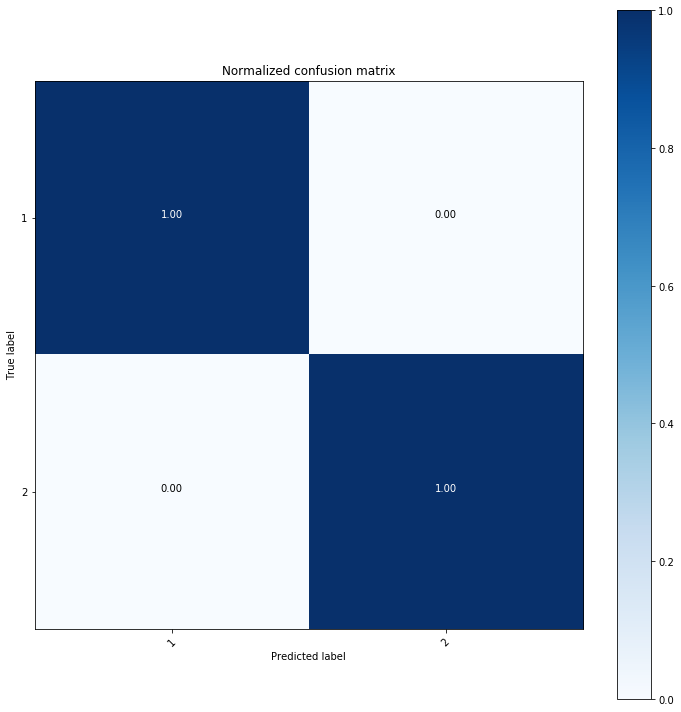

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[ 2.64069569 -0.19891296  2.3106166  ...  1.41954203 -1.37122412
  -2.51585862]
 [ 0.15444805 -0.21541034  0.21460752 ... -0.73506773 -0.66873316
  -2.10682171]
 [ 0.61990361 -0.25067057  0.66487958 ... -1.05163013  0.2446081
  -1.11349276]
 ...
 [-0.24321949 -0.16128095 -0.30569591 ...  1.419952   -1.43926098
  -2.04125161]
 [-0.12442212 -0.25423146 -0.08540947 ... -0.9135391   0.55497463
  -0.14352945]
 [ 0.68356693 -0.1943999   0.7521722  ... -0.72547604 -1.68883786
  -0.07720731]]


100%|██████████| 361/361 [00:20<00:00, 17.57it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.23333333 0.76666667]]


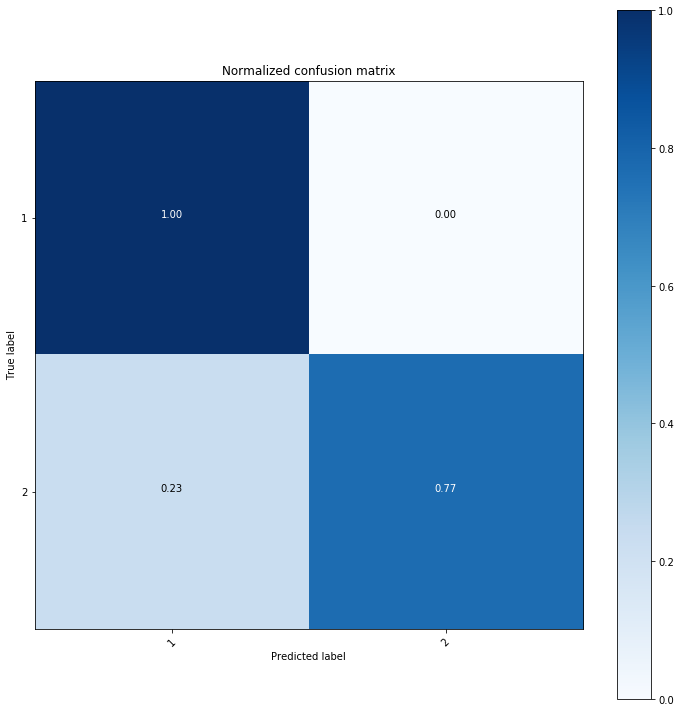

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.55it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.13333333 0.86666667]]


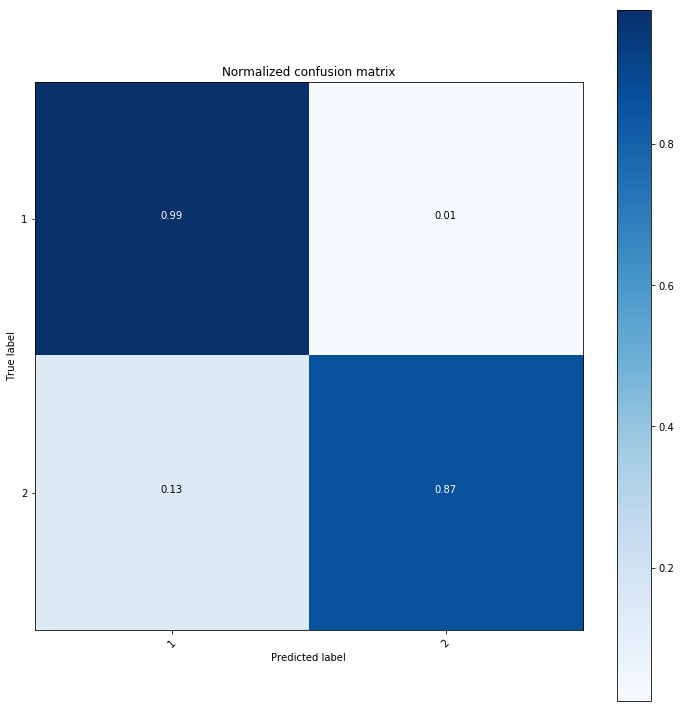

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.63it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


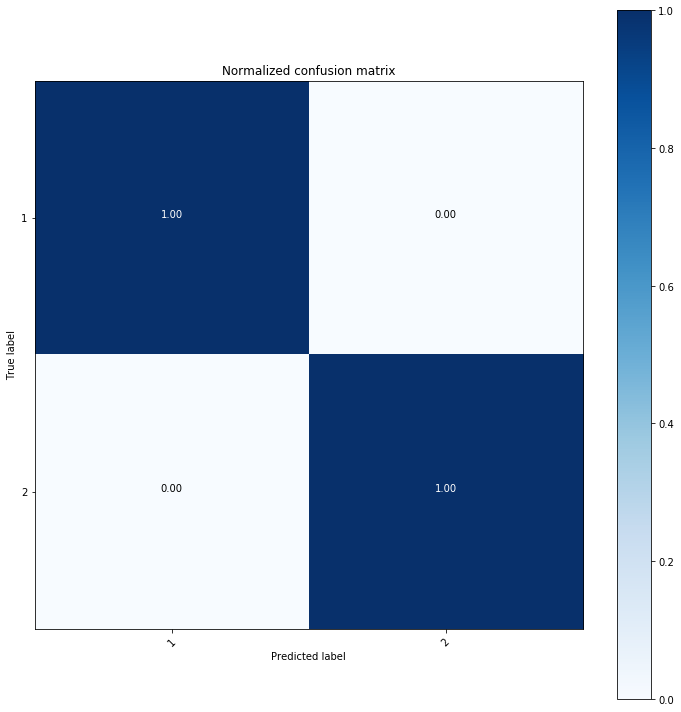

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[ 0.56471981 -0.32515145  0.74836456 ... -0.75026334 -0.07864911
  -2.23302977]
 [ 0.6219231  -0.32569391  0.81240057 ... -0.07100985 -0.59061932
  -2.36960352]
 [ 0.59306837 -0.32642728  0.77965488 ... -1.06356968  0.7593462
  -2.20130698]
 ...
 [-0.15074618 -0.32333228 -0.24419362 ... -0.99402265 -0.01250782
  -2.14475651]
 [ 0.09722897 -0.29226375 -0.02006758 ...  1.30090523 -0.65790567
  -1.78916671]
 [ 0.3645293  -0.31126725  0.29978907 ... -0.90962771 -2.13532777
   0.42363697]]


100%|██████████| 361/361 [00:20<00:00, 17.56it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.3        0.7       ]]


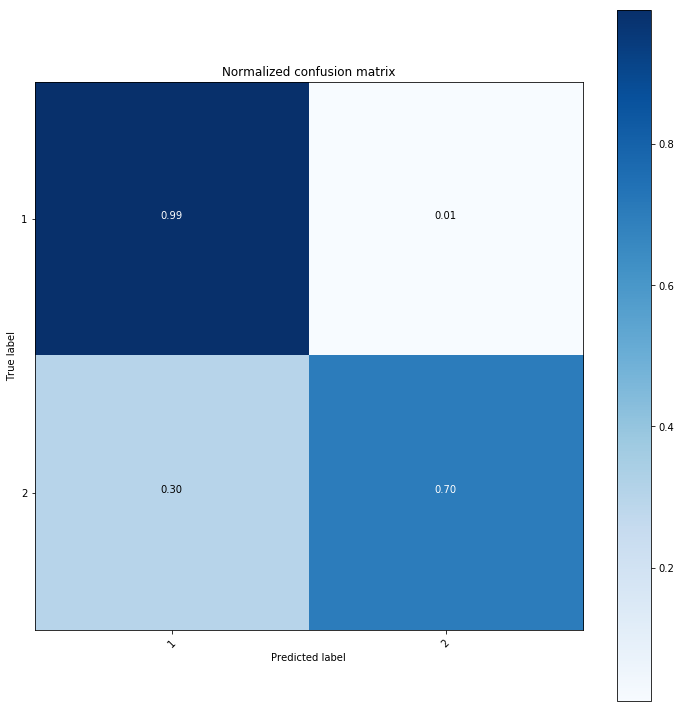

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.55it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.43333333 0.56666667]]


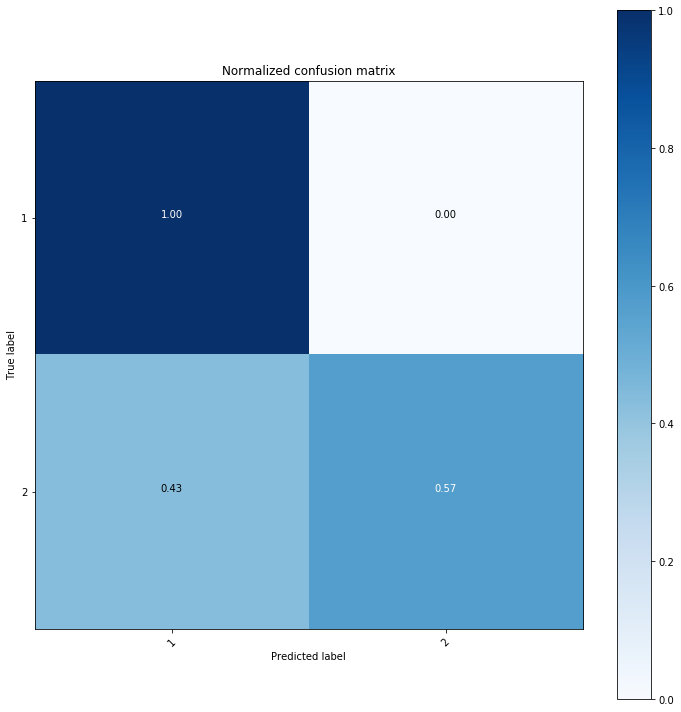

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.37it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


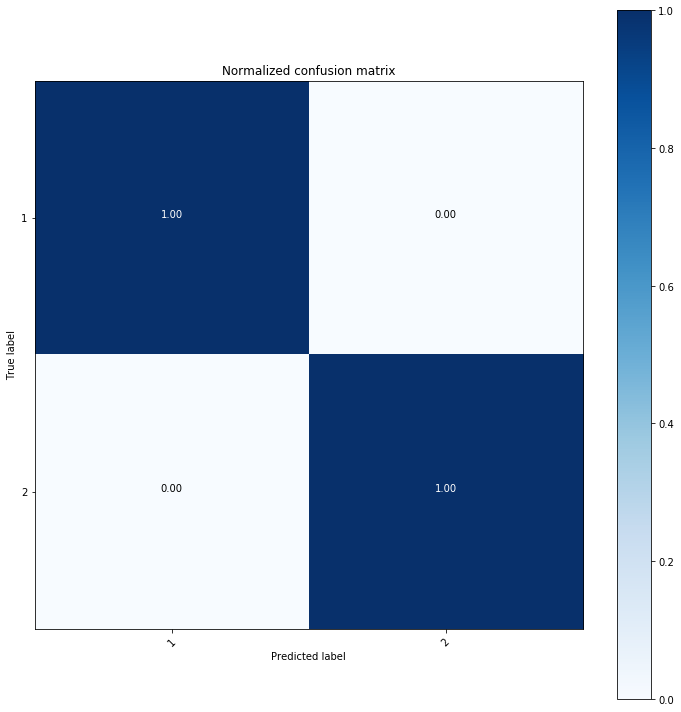

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[-0.5417681  -0.29971938 -0.55872186 ... -1.22697958  0.16315181
  -1.8714705 ]
 [-0.57084874 -0.28753261 -0.57847032 ... -1.46396622 -0.09502867
  -0.63919946]
 [-0.54547331 -0.28604    -0.57419148 ... -1.28251113  0.44091709
  -1.15559868]
 ...
 [ 0.30338417 -0.19251315  0.31103304 ... -1.24420655 -1.47138852
   0.59621243]
 [ 0.02090469 -0.16108313  0.07355786 ... -0.36657216 -1.39488451
  -0.6577837 ]
 [ 0.05593069 -0.22514618  0.18414922 ... -0.80512577 -1.81661384
   0.30507344]]


100%|██████████| 361/361 [00:20<00:00, 17.68it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:20<00:00, 17.55it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.9010989  0.0989011 ]
 [0.83333333 0.16666667]]


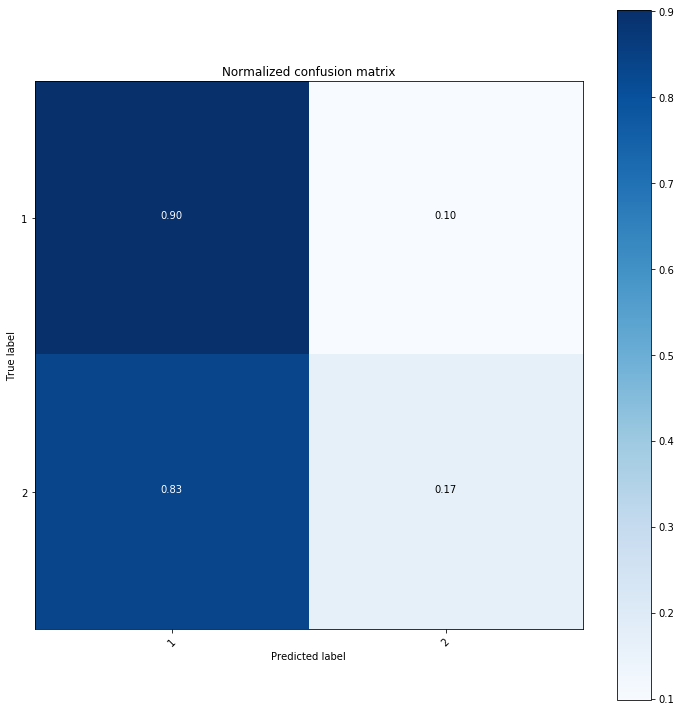

predicting 2 performance


100%|██████████| 361/361 [00:20<00:00, 17.42it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.83516484 0.16483516]
 [0.66666667 0.33333333]]


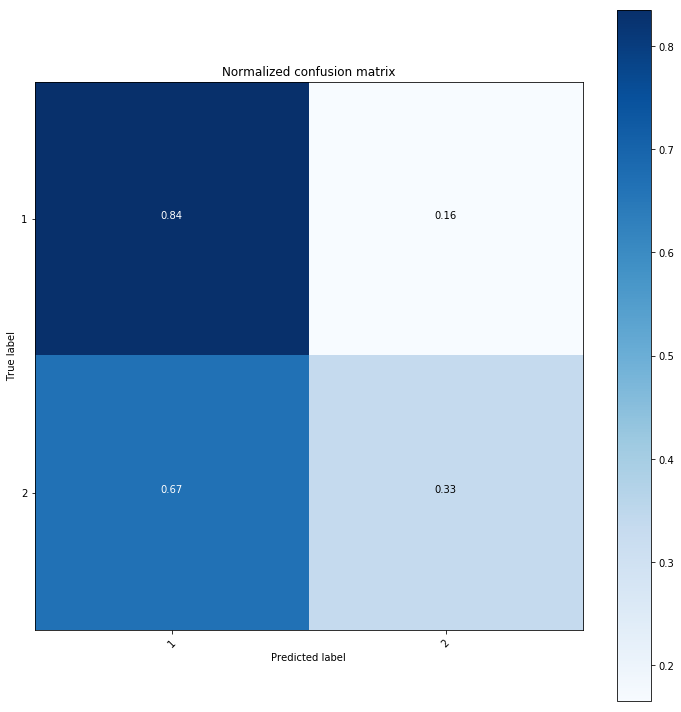

predicting 3 performance


100%|██████████| 361/361 [00:20<00:00, 17.58it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


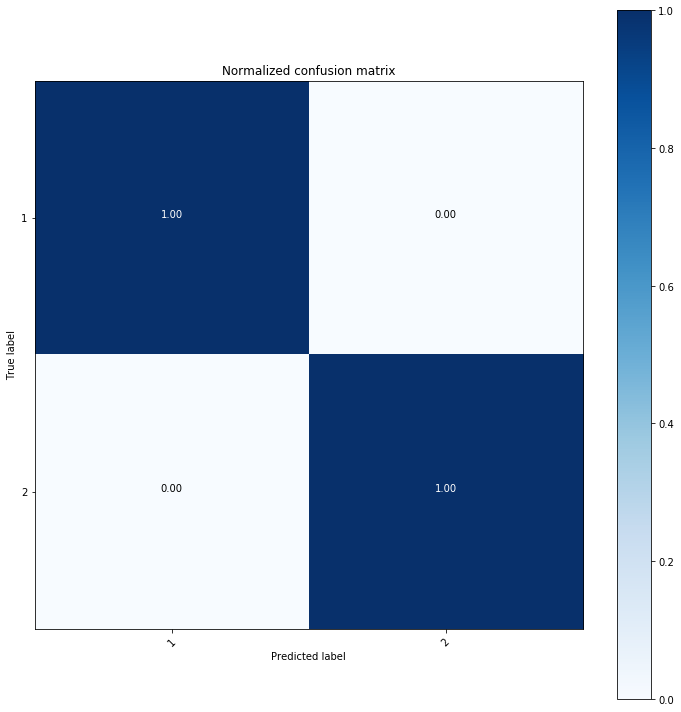

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)